In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
def bgr2rgb(img):
    return img[...,::-1]

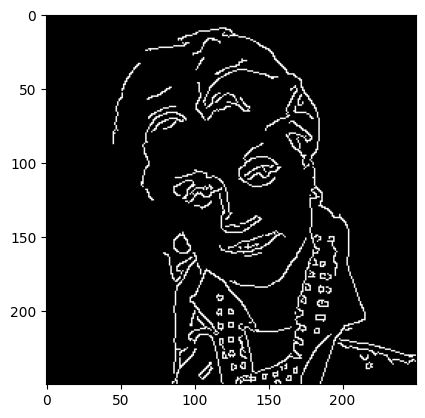

In [7]:
#cannny edge extractor
def canny_edge_extractor(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

img=bgr2rgb(cv2.imread('../../data/inputs/Angela_Lansbury_0002.jpg'))
edge_img=canny_edge_extractor(img)
plt.imshow(edge_img,cmap='gray')

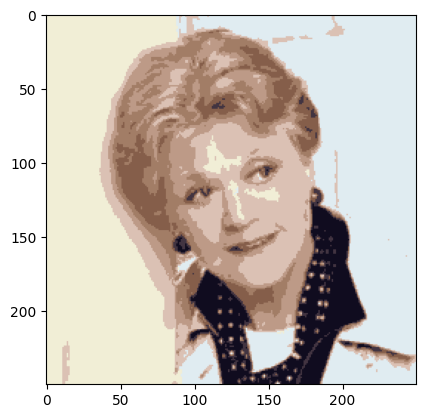

In [9]:
# lab space k-means clustering of an image
def lab_space_kmeans(img):
    img=cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    orig_img = img.reshape((-1,3)).astype(np.float32)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8
    _,label,center=cv2.kmeans(orig_img,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    kmeaned_img = center[label.flatten()]
    fin_img = kmeaned_img.reshape((img.shape))
    fin_img=cv2.cvtColor(fin_img,cv2.COLOR_LAB2RGB)
    return fin_img
img=bgr2rgb(cv2.imread("../../data/inputs/Angela_Lansbury_0002.jpg"))
kmean_img=lab_space_kmeans(img)
plt.imshow(kmean_img)

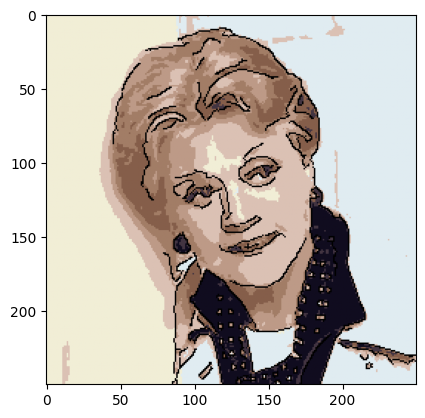

In [10]:
def blend_img(edge,quant):
    #multiply each channel of image by 2d edge image
    edge=(255-edge)/255
    edge=edge[...,np.newaxis]
    edge=np.concatenate((edge,edge,edge),axis=2)
    #normalize quantized image
    quant=quant/255
    blended_img=edge*quant
    return blended_img
fin_img = blend_img(edge_img,kmean_img)
plt.imshow(fin_img)